##### Importuojame bibliotekas

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

##### Aprašome kintamuosius

In [3]:
x_champ = np.arange( 0, 12,1  )
x_win   = np.arange(50,280,0.1)
x_award = np.arange( 0, 16,1  )
x_hof   = np.arange( 0,101,1  )

In [4]:
champ_low = fuzz.trapmf(x_champ,[0,0, 1, 3])
champ_med = fuzz.trapmf(x_champ,[2,3, 4, 6])
champ_hig = fuzz.trapmf(x_champ,[5,8,11,11])

In [5]:
win_low = fuzz.trapmf(x_win,[50, 50, 66, 70])
win_med = fuzz.trapmf(x_win,[65, 74, 80, 95])
win_hig = fuzz.trapmf(x_win,[80,106,280,280])

In [6]:
award_low = fuzz.trapmf(x_award,[0,0, 2, 4])
award_med = fuzz.trimf (x_award,[3,   6, 7])
award_hig = fuzz.trapmf(x_award,[6,8,15,15])

In [7]:
hof_low = fuzz.trapmf(x_hof,[ 0, 0, 20, 30])
hof_med = fuzz.trimf (x_hof,[23,    50, 75])
hof_hig = fuzz.trapmf(x_hof,[60,73,100,100])

##### Brėžiame grafikus

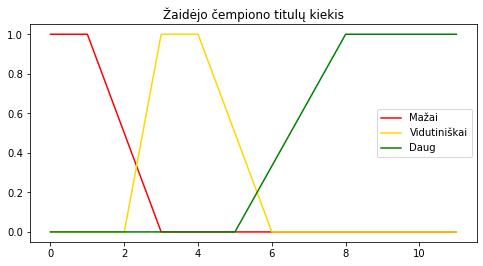

In [8]:
fig,(graph0) = plt.subplots(figsize = (8,4))
graph0.plot(x_champ,champ_low,'red',linewidth = 1.5,label = 'Mažai')
graph0.plot(x_champ,champ_med,'gold',linewidth = 1.5,label = 'Vidutiniškai')
graph0.plot(x_champ,champ_hig,'green',linewidth = 1.5,label = 'Daug')
graph0.set_title('Žaidėjo čempiono titulų kiekis')
graph0.legend()

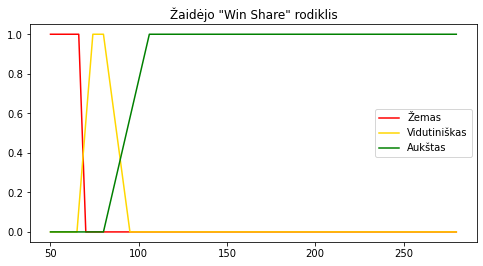

In [9]:
fig,(graph1) = plt.subplots(figsize = (8,4))
graph1.plot(x_win,win_low,'red',linewidth = 1.5,label = 'Žemas')
graph1.plot(x_win,win_med,'gold',linewidth = 1.5,label = 'Vidutiniškas')
graph1.plot(x_win,win_hig,'green',linewidth = 1.5,label = 'Aukštas')
graph1.set_title('Žaidėjo "Win Share" rodiklis')
graph1.legend()

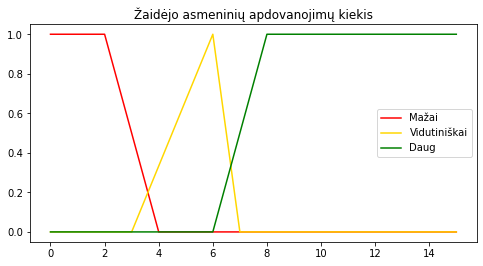

In [10]:
fig,(graph2) = plt.subplots(figsize = (8,4))
graph2.plot(x_award,award_low,'red',linewidth = 1.5,label = 'Mažai')
graph2.plot(x_award,award_med,'gold',linewidth = 1.5,label = 'Vidutiniškai')
graph2.plot(x_award,award_hig,'green',linewidth = 1.5,label = 'Daug')
graph2.set_title('Žaidėjo asmeninių apdovanojimų kiekis')
graph2.legend()

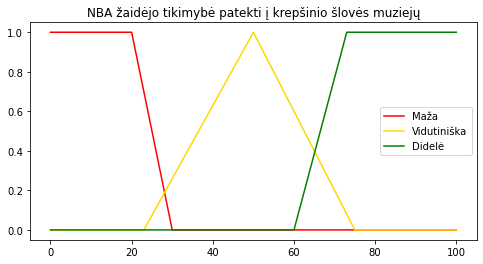

In [11]:
fig,(graph3) = plt.subplots(figsize = (8,4))
graph3.plot(x_hof,hof_low,'red',linewidth = 1.5,label = 'Maža')
graph3.plot(x_hof,hof_med,'gold',linewidth = 1.5,label = 'Vidutiniška')
graph3.plot(x_hof,hof_hig,'green',linewidth = 1.5,label = 'Didelė')
graph3.set_title('NBA žaidėjo tikimybė patekti į krepšinio šlovės muziejų')
graph3.legend()

##### Modelio testavimas

##### Pirmasis testavimas

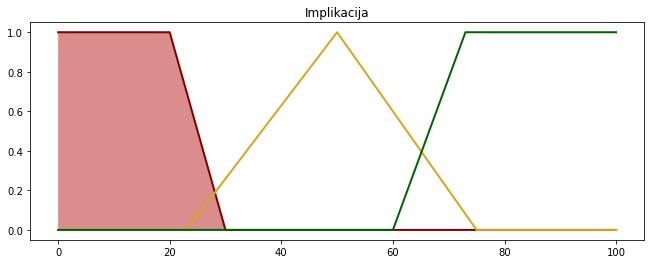

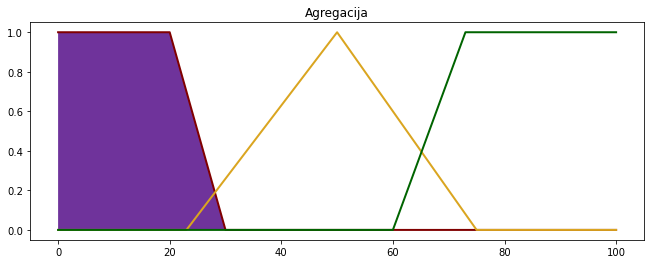

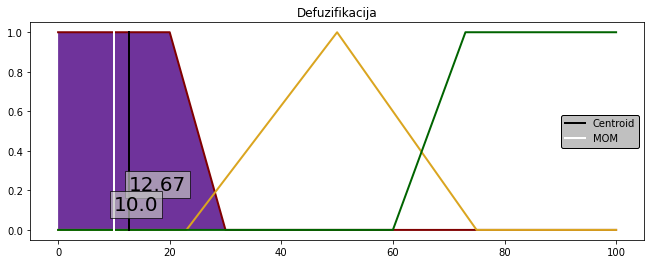

In [19]:
cha = 5
win = 52.6
awa = 3

chaAtLow = fuzz.interp_membership(x_champ, champ_low, cha)
chaAtMed = fuzz.interp_membership(x_champ, champ_med, cha)
chaAtHig = fuzz.interp_membership(x_champ, champ_hig, cha)

winAtLow = fuzz.interp_membership(x_win, win_low, win)
winAtMed = fuzz.interp_membership(x_win, win_med, win)
winAtHig = fuzz.interp_membership(x_win, win_hig, win)

awaAtLow = fuzz.interp_membership(x_award, award_low, awa)
awaAtMed = fuzz.interp_membership(x_award, award_med, awa)
awaAtHig = fuzz.interp_membership(x_award, award_hig, awa)

rule_Low1 = winAtLow
rule_Low2 = np.amin([winAtMed,awaAtLow])

rule_Med1 = np.amin([chaAtLow,winAtMed,awaAtMed])
rule_Med2 = np.amin([chaAtLow,winAtHig,awaAtLow])

rule_Hig1 = np.amin([winAtMed,awaAtHig])
rule_Hig2 = np.amin([winAtHig,1-awaAtLow])
rule_Hig3 = np.amin([1-chaAtLow,winAtMed,awaAtMed])
rule_Hig4 = np.amin([1-chaAtLow,winAtHig,awaAtLow])

out_ProbabilityLow = np.amax([rule_Low1,rule_Low2])
out_ProbabilityMed = np.amax([rule_Med1,rule_Med2])
out_ProbabilityHig = np.amax([rule_Hig1,rule_Hig2,rule_Hig3,rule_Hig4])

hofAtLow = np.fmin(out_ProbabilityLow, hof_low)
hofAtMed = np.fmin(out_ProbabilityMed, hof_med)
hofAtHig = np.fmin(out_ProbabilityHig, hof_hig)

hof0 = np.zeros_like(x_hof)

fig, ax0 = plt.subplots(figsize=(11, 4))
ax0.fill_between(x_hof, hof0, hofAtLow, facecolor='indianred', alpha=0.7)
ax0.plot(x_hof, hof_low, 'maroon', linewidth=2)
ax0.fill_between(x_hof, hof0, hofAtMed, facecolor='gold', alpha=0.7)
ax0.plot(x_hof, hof_med, 'goldenrod', linewidth=2)
ax0.fill_between(x_hof, hof0, hofAtHig, facecolor='forestgreen', alpha=0.7)
ax0.plot(x_hof, hof_hig, 'darkgreen', linewidth=2)
ax0.set_title('Implikacija')

aggregated = np.fmax(hofAtLow,np.fmax(hofAtMed,hofAtHig))
fig, ax1 = plt.subplots(figsize=(11, 4))
ax1.plot(x_hof, hof_low, 'maroon', linewidth=2)
ax1.plot(x_hof, hof_med, 'goldenrod', linewidth=2)
ax1.plot(x_hof, hof_hig, 'darkgreen', linewidth=2)
ax1.fill_between(x_hof, hof0, aggregated, facecolor='indigo', alpha=0.8)
ax1.set_title('Agregacija')

hofDefCentroid = fuzz.defuzz(x_hof, aggregated, 'centroid')
hofDefMOM = fuzz.defuzz(x_hof, aggregated, 'mom')

fig, ax2 = plt.subplots(figsize=(11, 4))
ax2.plot(x_hof, hof_low, 'maroon', linewidth=2)
ax2.plot(x_hof, hof_med, 'goldenrod', linewidth=2)
ax2.plot(x_hof, hof_hig, 'darkgreen', linewidth=2)
ax2.fill_between(x_hof, hof0, aggregated, facecolor='indigo', alpha=0.8)
ax2.plot([hofDefCentroid, hofDefCentroid], [0, fuzz.interp_membership(x_hof, aggregated, hofDefCentroid)], 'black', linewidth=2, label='Centroid')
ax2.text(hofDefCentroid, 0.2, np.round(hofDefCentroid,2), fontsize=20, bbox=dict(facecolor='silver', alpha=0.7))
ax2.plot([hofDefMOM, hofDefMOM], [0, fuzz.interp_membership(x_hof, aggregated, hofDefMOM)], 'white', linewidth=2, label='MOM')
ax2.text(hofDefMOM, 0.1, np.round(hofDefMOM,2), fontsize=20, bbox=dict(facecolor='silver', alpha=0.7))
ax2.set_title('Defuzifikacija')
ax2.legend(framealpha=1,facecolor='silver', edgecolor='black')

##### Antrasis testavimas

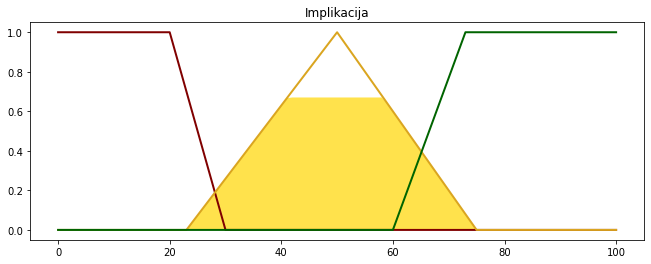

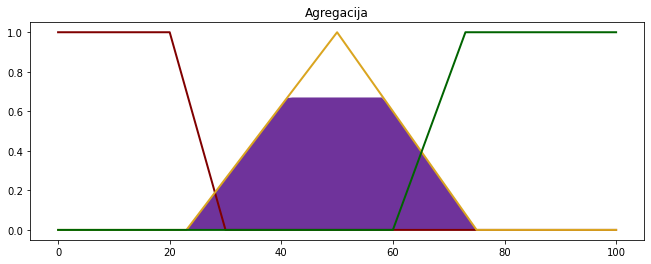

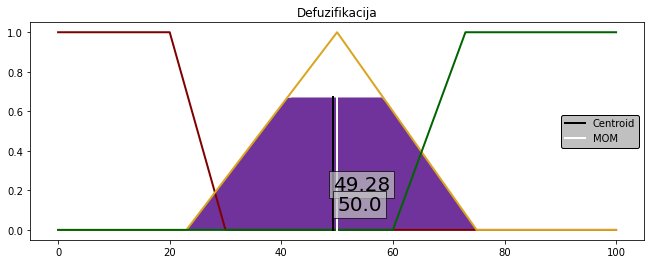

In [20]:
cha = 1
win = 97.42
awa = 0

chaAtLow = fuzz.interp_membership(x_champ, champ_low, cha)
chaAtMed = fuzz.interp_membership(x_champ, champ_med, cha)
chaAtHig = fuzz.interp_membership(x_champ, champ_hig, cha)

winAtLow = fuzz.interp_membership(x_win, win_low, win)
winAtMed = fuzz.interp_membership(x_win, win_med, win)
winAtHig = fuzz.interp_membership(x_win, win_hig, win)

awaAtLow = fuzz.interp_membership(x_award, award_low, awa)
awaAtMed = fuzz.interp_membership(x_award, award_med, awa)
awaAtHig = fuzz.interp_membership(x_award, award_hig, awa)

rule_Low1 = winAtLow
rule_Low2 = np.amin([winAtMed,awaAtLow])

rule_Med1 = np.amin([chaAtLow,winAtMed,awaAtMed])
rule_Med2 = np.amin([chaAtLow,winAtHig,awaAtLow])

rule_Hig1 = np.amin([winAtMed,awaAtHig])
rule_Hig2 = np.amin([winAtHig,1-awaAtLow])
rule_Hig3 = np.amin([1-chaAtLow,winAtMed,awaAtMed])
rule_Hig4 = np.amin([1-chaAtLow,winAtHig,awaAtLow])

out_ProbabilityLow = np.amax([rule_Low1,rule_Low2])
out_ProbabilityMed = np.amax([rule_Med1,rule_Med2])
out_ProbabilityHig = np.amax([rule_Hig1,rule_Hig2,rule_Hig3,rule_Hig4])

hofAtLow = np.fmin(out_ProbabilityLow, hof_low)
hofAtMed = np.fmin(out_ProbabilityMed, hof_med)
hofAtHig = np.fmin(out_ProbabilityHig, hof_hig)

hof0 = np.zeros_like(x_hof)

fig, ax0 = plt.subplots(figsize=(11, 4))
ax0.fill_between(x_hof, hof0, hofAtLow, facecolor='indianred', alpha=0.7)
ax0.plot(x_hof, hof_low, 'maroon', linewidth=2)
ax0.fill_between(x_hof, hof0, hofAtMed, facecolor='gold', alpha=0.7)
ax0.plot(x_hof, hof_med, 'goldenrod', linewidth=2)
ax0.fill_between(x_hof, hof0, hofAtHig, facecolor='forestgreen', alpha=0.7)
ax0.plot(x_hof, hof_hig, 'darkgreen', linewidth=2)
ax0.set_title('Implikacija')

aggregated = np.fmax(hofAtLow,np.fmax(hofAtMed,hofAtHig))
fig, ax1 = plt.subplots(figsize=(11, 4))
ax1.plot(x_hof, hof_low, 'maroon', linewidth=2)
ax1.plot(x_hof, hof_med, 'goldenrod', linewidth=2)
ax1.plot(x_hof, hof_hig, 'darkgreen', linewidth=2)
ax1.fill_between(x_hof, hof0, aggregated, facecolor='indigo', alpha=0.8)
ax1.set_title('Agregacija')

hofDefCentroid = fuzz.defuzz(x_hof, aggregated, 'centroid')
hofDefMOM = fuzz.defuzz(x_hof, aggregated, 'mom')

fig, ax2 = plt.subplots(figsize=(11, 4))
ax2.plot(x_hof, hof_low, 'maroon', linewidth=2)
ax2.plot(x_hof, hof_med, 'goldenrod', linewidth=2)
ax2.plot(x_hof, hof_hig, 'darkgreen', linewidth=2)
ax2.fill_between(x_hof, hof0, aggregated, facecolor='indigo', alpha=0.8)
ax2.plot([hofDefCentroid, hofDefCentroid], [0, fuzz.interp_membership(x_hof, aggregated, hofDefCentroid)], 'black', linewidth=2, label='Centroid')
ax2.text(hofDefCentroid, 0.2, np.round(hofDefCentroid,2), fontsize=20, bbox=dict(facecolor='silver', alpha=0.7))
ax2.plot([hofDefMOM, hofDefMOM], [0, fuzz.interp_membership(x_hof, aggregated, hofDefMOM)], 'white', linewidth=2, label='MOM')
ax2.text(hofDefMOM, 0.1, np.round(hofDefMOM,2), fontsize=20, bbox=dict(facecolor='silver', alpha=0.7))
ax2.set_title('Defuzifikacija')
ax2.legend(framealpha=1,facecolor='silver', edgecolor='black')

##### Trečiasis testavimas

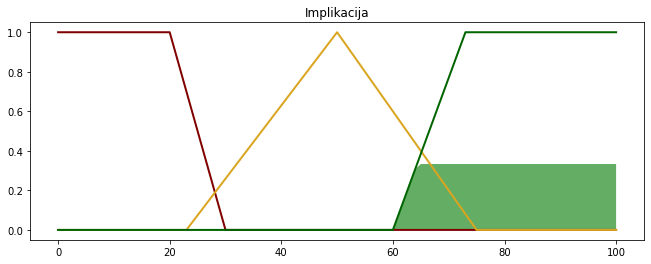

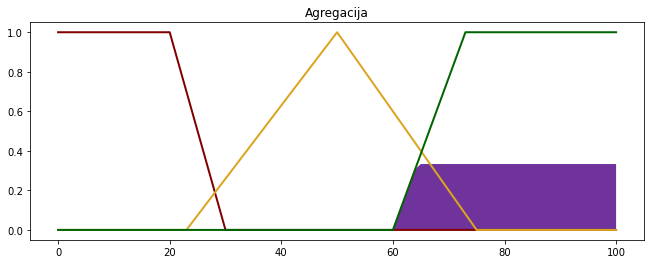

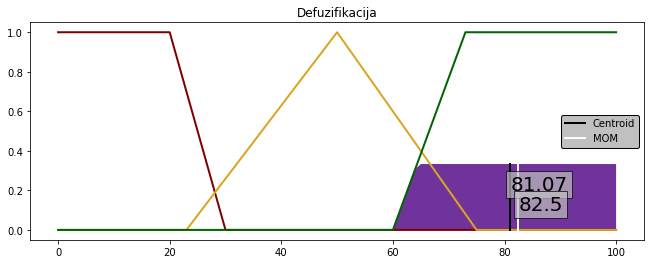

In [25]:
cha = 7
win = 76.35
awa = 4

chaAtLow = fuzz.interp_membership(x_champ, champ_low, cha)
chaAtMed = fuzz.interp_membership(x_champ, champ_med, cha)
chaAtHig = fuzz.interp_membership(x_champ, champ_hig, cha)

winAtLow = fuzz.interp_membership(x_win, win_low, win)
winAtMed = fuzz.interp_membership(x_win, win_med, win)
winAtHig = fuzz.interp_membership(x_win, win_hig, win)

awaAtLow = fuzz.interp_membership(x_award, award_low, awa)
awaAtMed = fuzz.interp_membership(x_award, award_med, awa)
awaAtHig = fuzz.interp_membership(x_award, award_hig, awa)

rule_Low1 = winAtLow
rule_Low2 = np.amin([winAtMed,awaAtLow])

rule_Med1 = np.amin([chaAtLow,winAtMed,awaAtMed])
rule_Med2 = np.amin([chaAtLow,winAtHig,awaAtLow])

rule_Hig1 = np.amin([winAtMed,awaAtHig])
rule_Hig2 = np.amin([winAtHig,1-awaAtLow])
rule_Hig3 = np.amin([1-chaAtLow,winAtMed,awaAtMed])
rule_Hig4 = np.amin([1-chaAtLow,winAtHig,awaAtLow])

out_ProbabilityLow = np.amax([rule_Low1,rule_Low2])
out_ProbabilityMed = np.amax([rule_Med1,rule_Med2])
out_ProbabilityHig = np.amax([rule_Hig1,rule_Hig2,rule_Hig3,rule_Hig4])

hofAtLow = np.fmin(out_ProbabilityLow, hof_low)
hofAtMed = np.fmin(out_ProbabilityMed, hof_med)
hofAtHig = np.fmin(out_ProbabilityHig, hof_hig)

hof0 = np.zeros_like(x_hof)

fig, ax0 = plt.subplots(figsize=(11, 4))
ax0.fill_between(x_hof, hof0, hofAtLow, facecolor='indianred', alpha=0.7)
ax0.plot(x_hof, hof_low, 'maroon', linewidth=2)
ax0.fill_between(x_hof, hof0, hofAtMed, facecolor='gold', alpha=0.7)
ax0.plot(x_hof, hof_med, 'goldenrod', linewidth=2)
ax0.fill_between(x_hof, hof0, hofAtHig, facecolor='forestgreen', alpha=0.7)
ax0.plot(x_hof, hof_hig, 'darkgreen', linewidth=2)
ax0.set_title('Implikacija')

aggregated = np.fmax(hofAtLow,np.fmax(hofAtMed,hofAtHig))
fig, ax1 = plt.subplots(figsize=(11, 4))
ax1.plot(x_hof, hof_low, 'maroon', linewidth=2)
ax1.plot(x_hof, hof_med, 'goldenrod', linewidth=2)
ax1.plot(x_hof, hof_hig, 'darkgreen', linewidth=2)
ax1.fill_between(x_hof, hof0, aggregated, facecolor='indigo', alpha=0.8)
ax1.set_title('Agregacija')

hofDefCentroid = fuzz.defuzz(x_hof, aggregated, 'centroid')
hofDefMOM = fuzz.defuzz(x_hof, aggregated, 'mom')

fig, ax2 = plt.subplots(figsize=(11, 4))
ax2.plot(x_hof, hof_low, 'maroon', linewidth=2)
ax2.plot(x_hof, hof_med, 'goldenrod', linewidth=2)
ax2.plot(x_hof, hof_hig, 'darkgreen', linewidth=2)
ax2.fill_between(x_hof, hof0, aggregated, facecolor='indigo', alpha=0.8)
ax2.plot([hofDefCentroid, hofDefCentroid], [0, fuzz.interp_membership(x_hof, aggregated, hofDefCentroid)], 'black', linewidth=2, label='Centroid')
ax2.text(hofDefCentroid, 0.2, np.round(hofDefCentroid,2), fontsize=20, bbox=dict(facecolor='silver', alpha=0.7))
ax2.plot([hofDefMOM, hofDefMOM], [0, fuzz.interp_membership(x_hof, aggregated, hofDefMOM)], 'white', linewidth=2, label='MOM')
ax2.text(hofDefMOM, 0.1, np.round(hofDefMOM,2), fontsize=20, bbox=dict(facecolor='silver', alpha=0.7))
ax2.set_title('Defuzifikacija')
ax2.legend(framealpha=1,facecolor='silver', edgecolor='black')